# Model to calculate if a student can get admission to BIT at 10th, 12th and JEE marks.

CODE by - Shashwat Saket

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:\\Users\\shash\\Desktop\\SCP\\BITAdmission.csv")
data.head()

,TENTH,TWELFTH,JEE,Decision
0,8.400,8.785,9.50,YES
1,9.870,8.857,9.60,YES
2,9.822,8.475,9.79,YES
3,9.129,7.682,9.99,YES
4,9.369,8.698,9.98,YES


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TENTH     59 non-null     float64
 1   TWELFTH   59 non-null     float64
 2   JEE       59 non-null     float64
 3   Decision  59 non-null     object 
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [4]:
data.describe()

,TENTH,TWELFTH,JEE
count,59.000000,59.000000,59.000000
mean,8.360051,7.831271,9.237458
std,0.776500,0.982750,0.585843
min,7.000000,3.658000,8.150000
25%,7.656000,7.472500,8.590000
50%,8.400000,7.857000,9.460000
75%,8.739000,8.412500,9.705000
max,9.995000,9.658000,10.000000


In [5]:
data["Decision"].unique()

array(['YES', 'NO', 'NEXTROUND'], dtype=object)

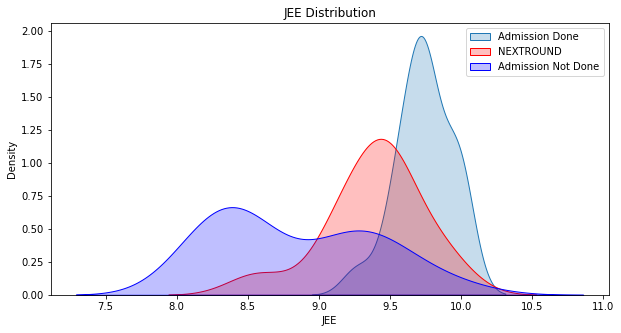

In [6]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=data[data["Decision"]=="YES"],x="JEE",shade=True,label="Admission Done")
sns.kdeplot(data=data[data["Decision"]=="NEXTROUND"],x="JEE",shade=True,color="red",label="NEXTROUND")
sns.kdeplot(data=data[data["Decision"]=="NO"],x="JEE",color="blue",shade=True,label="Admission Not Done")
plt.title("JEE Distribution")
plt.legend()



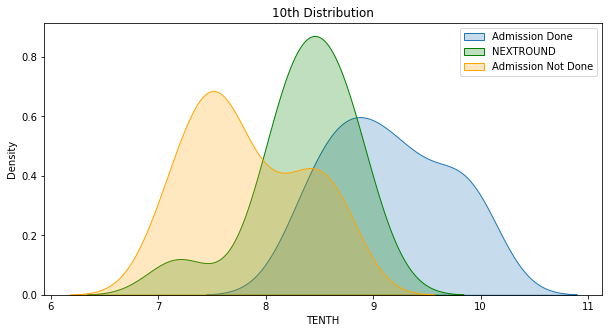

In [7]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=data[data["Decision"]=="YES"],x="TENTH",shade=True,label="Admission Done")
sns.kdeplot(data=data[data["Decision"]=="NEXTROUND"],x="TENTH",shade=True,color="green",label="NEXTROUND")
sns.kdeplot(data=data[data["Decision"]=="NO"],x="TENTH",color="orange",shade=True,label="Admission Not Done")
plt.title("10th Distribution")
plt.legend()

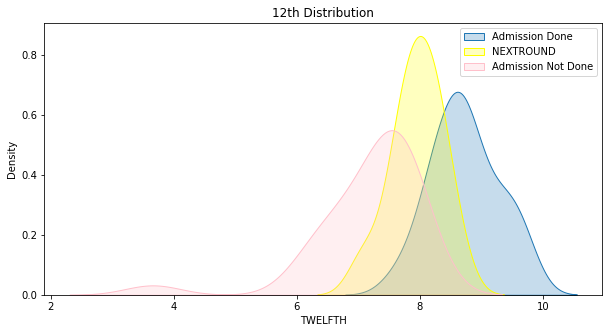

In [8]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=data[data["Decision"]=="YES"],x="TWELFTH",shade=True,label="Admission Done")
sns.kdeplot(data=data[data["Decision"]=="NEXTROUND"],x="TWELFTH",shade=True,color="yellow",label="NEXTROUND")
sns.kdeplot(data=data[data["Decision"]=="NO"],x="TWELFTH",color="pink",shade=True,label="Admission Not Done")
plt.title("12th Distribution")
plt.legend()

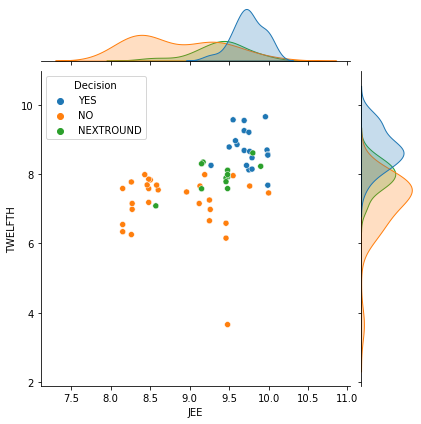

In [9]:
sns.jointplot(data=data,x="JEE",y="TWELFTH",hue="Decision")

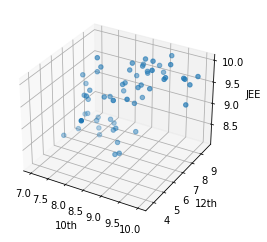

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
x=data['TENTH']
y=data['TWELFTH']
z=data['JEE']
ax.set_xlabel("10th")
ax.set_ylabel("12th")
ax.set_zlabel("JEE")
ax.scatter(x,y,z)
plt.show()


<AxesSubplot:>

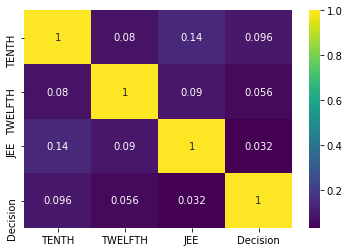

In [11]:
cf=data.copy()
cf["Decision"]=cf["Decision"].astype("category")
cf["Decision"]=cf["Decision"].cat.codes
sns.heatmap(cf.corr()**3,annot=True,cmap='viridis')

In [12]:
cf.head()

,TENTH,TWELFTH,JEE,Decision
0,8.400,8.785,9.50,2
1,9.870,8.857,9.60,2
2,9.822,8.475,9.79,2
3,9.129,7.682,9.99,2
4,9.369,8.698,9.98,2


In [13]:
X=cf.drop("Decision",axis=1)
y=cf["Decision"]

In [14]:
from sklearn.preprocessing import StandardScaler
prep=StandardScaler()
X=prep.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier()
knc=KNeighborsClassifier()
lregression=LogisticRegression()
rforest.fit(X_train,y_train)
knc.fit(X_train,y_train)
lregression.fit(X_train,y_train)
print("The score for Random Forest Classifier is {:.2f}".format(rforest.score(X_test,y_test)))
print("The score for K-Nearest Neighbor Classifier is {:.2f}".format(knc.score(X_test,y_test)))
print("The score for Logistic Regression is {:.2f}".format(lregression.score(X_test,y_test)))


The score for Random Forest Classifier is 0.80
The score for K-Nearest Neighbor Classifier is 0.67
The score for Logistic Regression is 0.67


In [17]:
error=[]
for e in range (1,50):
    knc=KNeighborsClassifier()
    knc.fit(X_train,y_train)
    p=knc.predict(X_test)
    error.append(np.mean(y_test!=p))

In [19]:
score=[]
for i in range(1,60):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    knn=KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
np.array(score).mean()

0.8485875706214688